In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras import regularizers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [0]:
x_train=x_train/255;
x_test=x_test/255;

In [0]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(10,activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=200,callbacks=[EarlyStopping(monitor='val_acc', patience=2)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 131us/step - loss: 1.6376 - acc: 0.8529 - val_loss: 0.4975 - val_acc: 0.9429
Epoch 2/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.4506 - acc: 0.9413 - val_loss: 0.3906 - val_acc: 0.9423
Epoch 3/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3692 - acc: 0.9514 - val_loss: 0.3520 - val_acc: 0.9500
Epoch 4/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.3242 - acc: 0.9593 - val_loss: 0.2609 - val_acc: 0.9763
Epoch 5/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.3031 - acc: 0.9614 - val_loss: 0.2507 - val_acc: 0.9765


In [0]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [0]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs

In [0]:
functor = K.function([inp, K.learning_phase()], outputs )

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

28

In [0]:
outputs

[<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 8, 8, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 4, 4, 64) dtype=float32>,
 <tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'dense_1/Relu:0' shape=(?, 512) dtype=float32>,
 <tf.Tensor 'dropout_1/cond/Merge:0' shape=(?, 512) dtype=float32>,
 <tf.Tensor 'dense_2/Relu:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'dropout_2/cond/Merge:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'dense_3/Sigmoid:0' shape=(?, 10) dtype=float32>]

In [0]:
import tensorflow as tf

In [0]:
from sklearn.metrics import roc_curve,auc,confusion_matrix
y_predicted=model.predict(x_test)

In [0]:
y_test.shape

(10000, 10)

In [0]:
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(10):
  fpr[i],tpr[i],_=roc_curve(y_test[:,i],y_predicted[:,i])
  roc_auc[i]=auc(fpr[i],tpr[i])

In [0]:
import matplotlib.pyplot as plt

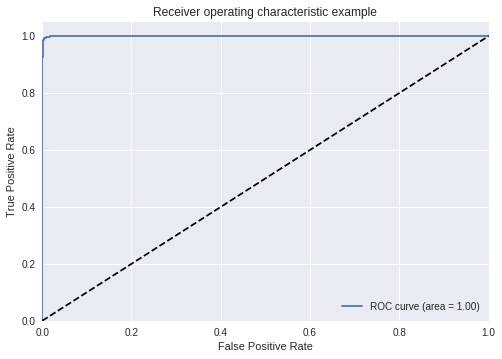

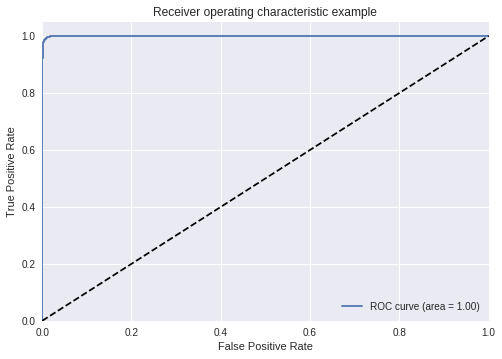

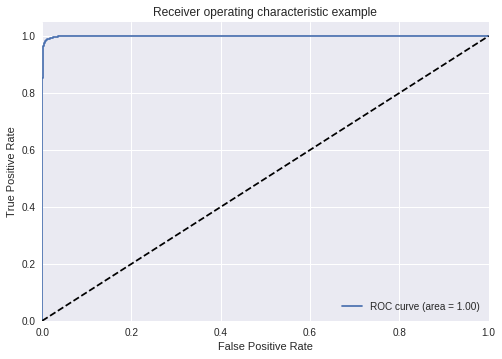

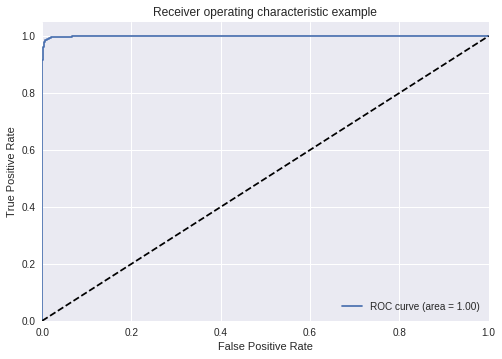

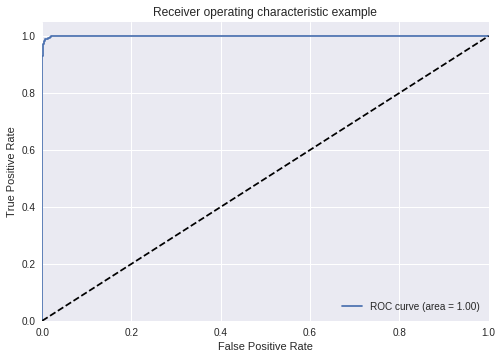

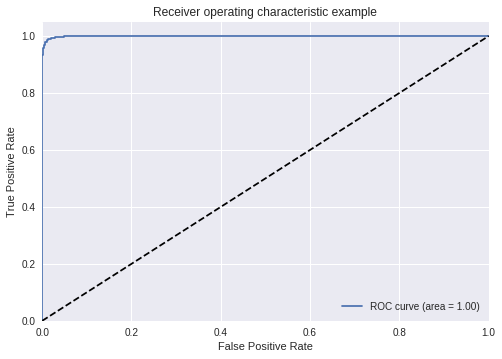

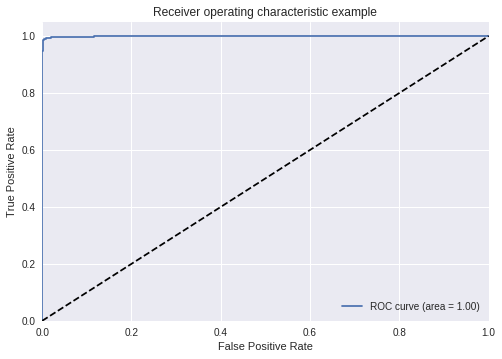

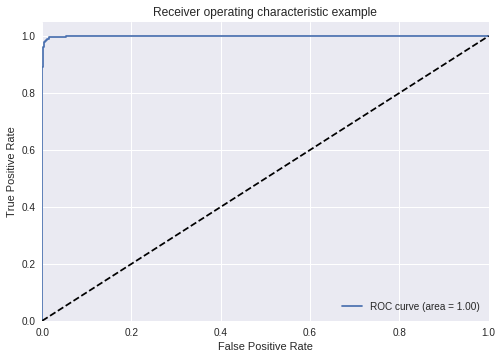

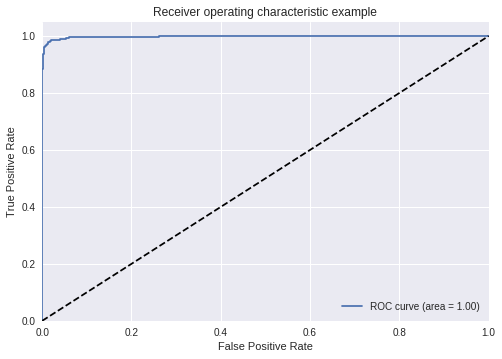

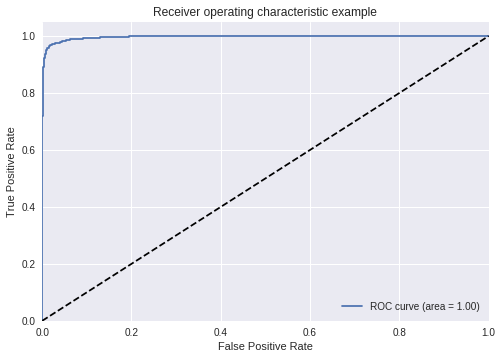

In [0]:
for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()